In [11]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [12]:
os.chdir("/Users/andrewcaffey/Documents/Projects/Data/PCPP/parts/x_csv_files/")
df = pd.read_csv('motherboard_csv.csv')

In [13]:
print df.shape, df[df.avg==0].avg.count()

(2400, 44) 1782


In [14]:
#map categorical variable values to integers
chipset_mapping = {x:y for x,y in zip(df.Chipset.unique(),range(len(df.Chipset.unique())))}
df['Chipset_int'] = df.Chipset.map(chipset_mapping)

socket_mapping = {x:y for x,y in zip(df.socket.unique(),range(len(df.socket.unique())))}
df['socket_int'] = df.socket.map(socket_mapping)

df['Form_Factor'] = df['Form Factor']
form_factor_mapping = {x:y for x,y in zip(df.Form_Factor.unique(),range(len(df.Form_Factor.unique())))}
df['Form_Factor_int'] = df.Form_Factor.map(form_factor_mapping)

df['Memory_Type'] = df['Memory Type']
memory_type_mapping = {x:y for x,y in zip(df.Memory_Type.unique(),range(len(df.Memory_Type.unique())))}
df['Memory_Type_int'] = df.Memory_Type.map(memory_type_mapping)

df['Memory_Slots'] = df['Memory Slots']
memory_slots_mapping = {x:y for x,y in zip(df.Memory_Slots.unique(),range(len(df.Memory_Slots.unique())))}
df['Memory_Slots_int'] = df.Memory_Slots.map(memory_slots_mapping)

manufacturer_mapping = {x:y for x,y in zip(df.Manufacturer.unique(),range(len(df.Manufacturer.unique())))}
df['Manufacturer_int'] = df.Manufacturer.map(manufacturer_mapping)

df['SLI_Support'] = df['SLI Support']
sli_mapping = {x:y for x,y in zip(df.SLI_Support.unique(),range(len(df.SLI_Support.unique())))}
df['SLI_Support_int'] = df.SLI_Support.map(sli_mapping)

In [15]:
#drop NaN values, seperate X and y
cols = ['avg', 'max_mem', 'Memory_Slots_int', 'SLI_Support_int', 'Memory_Type_int', 'Form_Factor_int', 'socket_int','Chipset_int']
feature_cols = ['max_mem', 'Memory_Slots_int', 'SLI_Support_int','Memory_Type_int', 'Form_Factor_int', 'socket_int','Chipset_int']
X = df[cols][df.avg>0].dropna()[feature_cols]
y = df[cols][df.avg>0].avg

In [16]:
X.shape, y.shape

((618, 7), (618,))

In [67]:
df[df.avg==0].sample(1)['Part #']

234    A76ML-K 3.0
Name: Part #, dtype: object

In [68]:
rfreg.predict(np.array(df.ix[234][feature_cols]))

array([ 82.61848925])

In [40]:
from sklearn.ensemble import RandomForestRegressor
# max_features=8 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=80, max_features=6, oob_score=True, random_state=5)
rfreg.fit(X, y)
feature_importance = pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)
print feature_importance

            feature  importance
1  Memory_Slots_int    0.352454
2   SLI_Support_int    0.155018
3   Memory_Type_int    0.127274
4   Form_Factor_int    0.113944
6       Chipset_int    0.088664
0           max_mem    0.085077
5        socket_int    0.077571


In [37]:
feature_importance = pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)

In [39]:
print feature_importance

            feature  importance
1  Memory_Slots_int    0.352454
2   SLI_Support_int    0.155018
3   Memory_Type_int    0.127274
4   Form_Factor_int    0.113944
6       Chipset_int    0.088664
0           max_mem    0.085077
5        socket_int    0.077571


In [398]:
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores1 = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores1.append(np.mean(np.sqrt(-MSE_scores)))

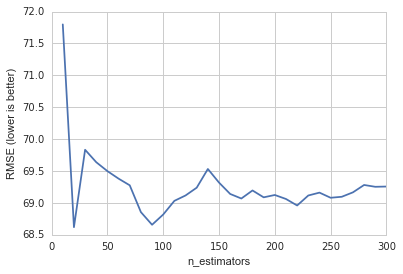

In [399]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
sns.set_style('whitegrid')
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')
sns.plt.plot(estimator_range, RMSE_scores1)

(0, 500)

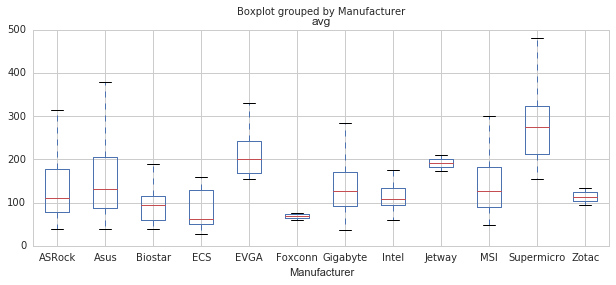

In [166]:
df[df.avg>0].boxplot(column='avg', by='Manufacturer', figsize=(10,4))
plt.ylim([0,500])

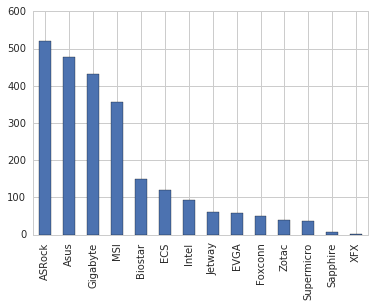

In [197]:
df.Manufacturer.value_counts().plot(kind='bar')

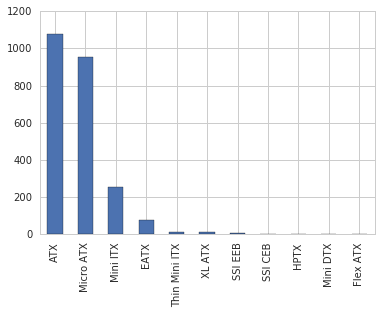

In [202]:
df['Form Factor'].value_counts().plot(kind='bar')

(0, 700)

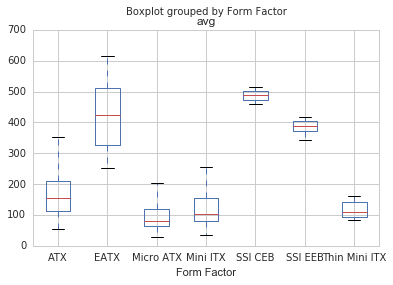

In [199]:
df[(df.avg>0)].boxplot(column='avg', by='Form Factor')
plt.ylim(0,700)

In [20]:
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores1 = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores1.append(np.mean(np.sqrt(-MSE_scores)))

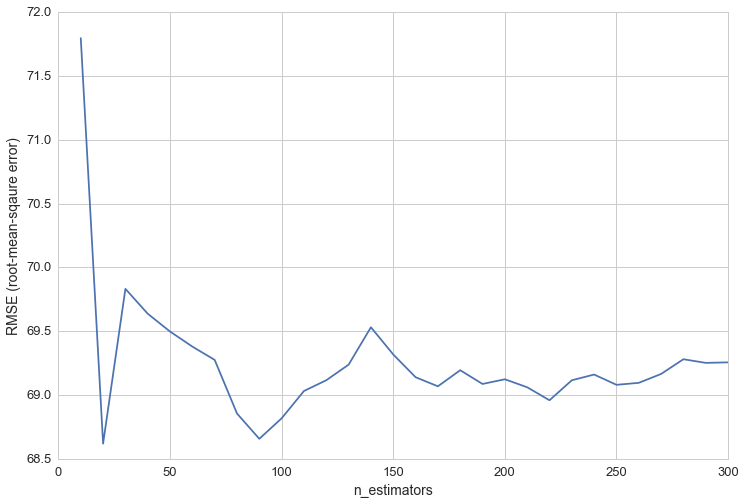

In [41]:
plt.figure(figsize=(12,8))
plt.xlabel('n_estimators', fontsize=14)
plt.ylabel('RMSE (root-mean-sqaure error)', fontsize=14)
plt.plot(estimator_range, RMSE_scores1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/motherboard/n_est_vs_rmse.png'))

In [50]:
sorted(zip(RMSE_scores1, estimator_range))[0]

(68.618477893021762, 20)

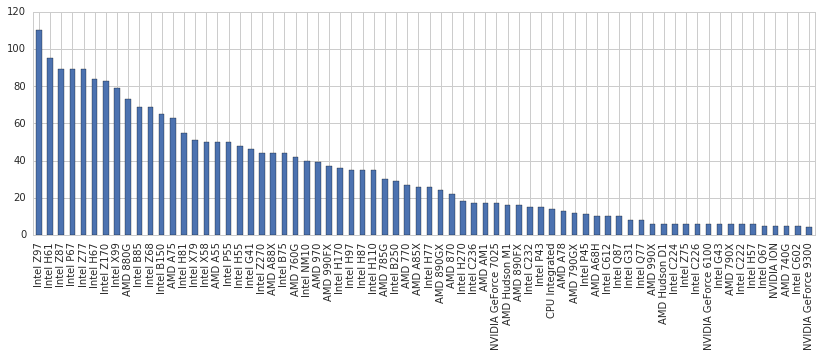

In [193]:
df.Chipset.value_counts()[:70].plot(kind='bar', figsize=(14,4))

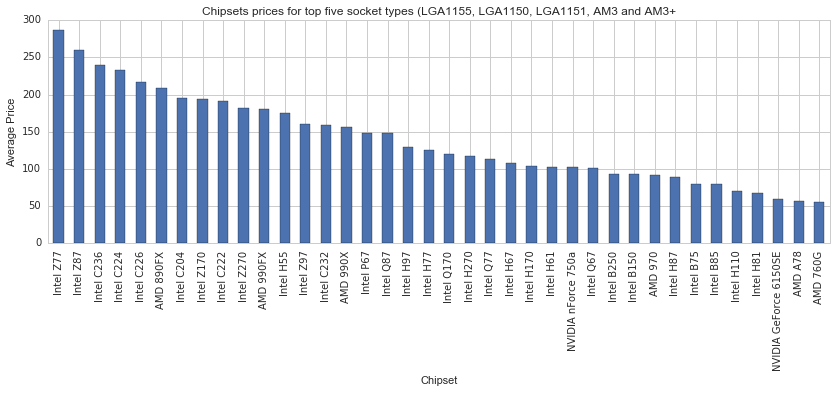

In [238]:
plt.title('Chipsets prices for top five socket types (LGA1155, LGA1150, LGA1151, AM3 and AM3+)')
plt.ylabel('Average Price')
plt.xlabel('Chipset')
df[(df.avg>0)&((df.socket=='LGA1155')|(df.socket=='LGA1150')|(df.socket=='LGA1151')|(df.socket=='AM3')|(df.socket=='AM3+'))].groupby('Chipset').avg.mean().sort_values(ascending=False)[:70].plot(kind='bar',figsize=(14,4))

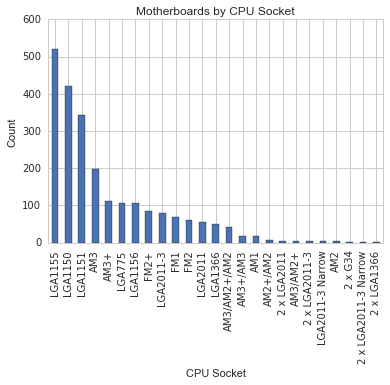

In [210]:
df['CPU Socket'].value_counts().plot(kind='bar')
plt.title('Motherboards by CPU Socket')
plt.xlabel('CPU Socket')
plt.ylabel('Count')

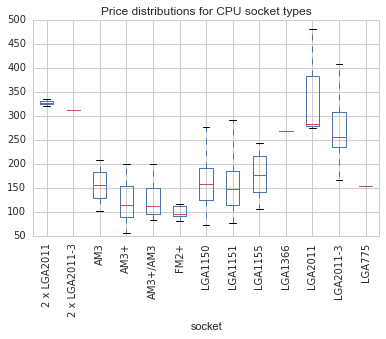

In [213]:
df[(df['Form Factor']=='ATX')&(df.avg>0)].boxplot(column='avg', by='socket', rot=90)
plt.suptitle('')
plt.title('Price distributions for CPU socket types')

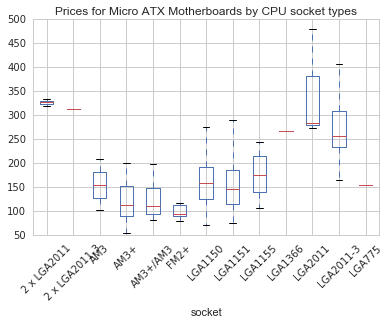

In [242]:
df[(df['Form Factor']=='ATX')&(df.avg>0)].boxplot(column='avg', by='socket', rot=45)
plt.suptitle('')
plt.title('Prices for Micro ATX Motherboards by CPU socket types')

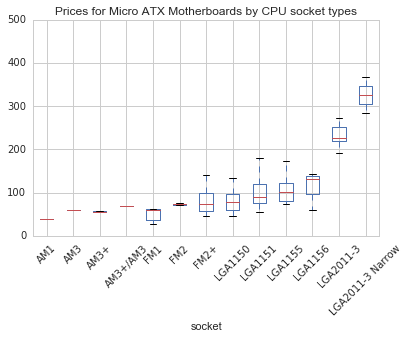

In [206]:
df[(df['Form Factor']=='Micro ATX')&(df.avg>0)].boxplot(column='avg', by='socket', rot=45)
plt.suptitle('')
plt.title('Prices for Micro ATX Motherboards by CPU socket types')

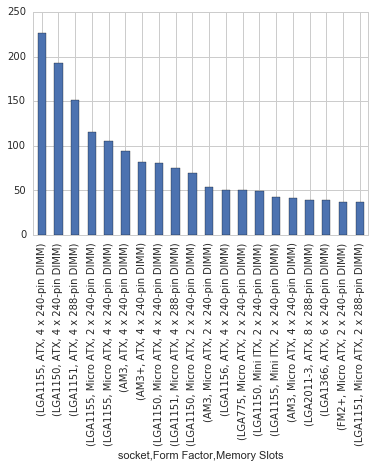

In [257]:
#most common type of motherboard: socket, form factor and memory dimm; show price distributions
df.groupby(['socket','Form Factor','Memory Slots']).avg.count().sort_values(ascending=False)[:20].plot(kind='bar')

In [261]:
#most common type of motherboard: socket, form factor and memory dimm; show price distributions
df.groupby(['socket','Form Factor','Memory Slots']).avg.mean().sort_values(ascending=False).count()

119

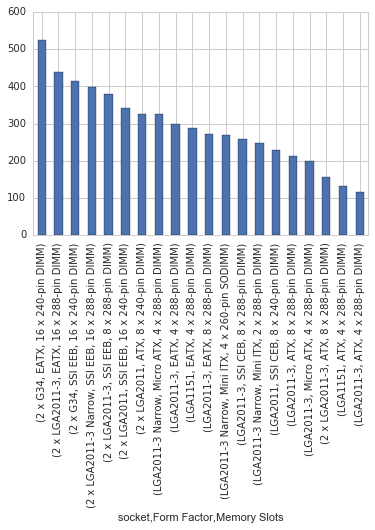

In [258]:
#most common type of motherboard: socket, form factor and memory dimm; show price distributions
df.groupby(['socket','Form Factor','Memory Slots']).avg.mean().sort_values(ascending=False)[:20].plot(kind='bar')

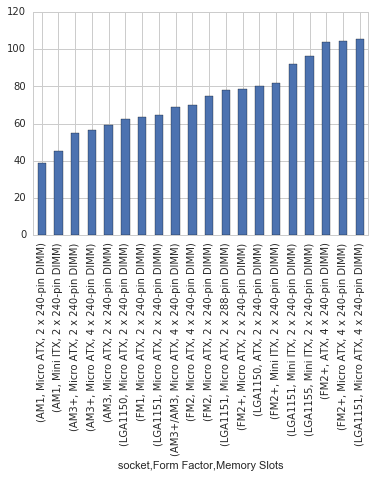

In [260]:
#most common type of motherboard: socket, form factor and memory dimm; show price distributions
df[df.avg>0].groupby(['socket','Form Factor','Memory Slots']).avg.mean().sort_values(ascending=True)[:20].plot(kind='bar')

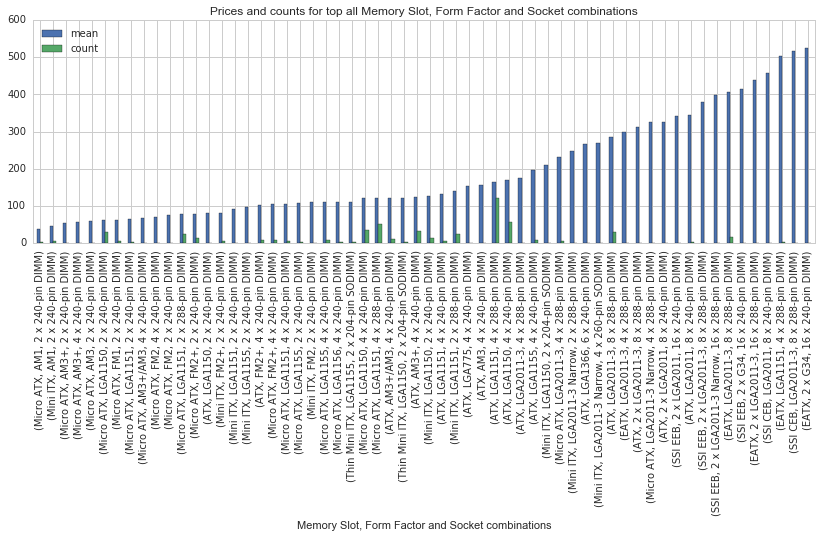

In [320]:
#most common type of motherboard: socket, form factor and memory dimm; show price distributions
df[df.avg>0].groupby(['Form Factor', 'socket', 'Memory Slots']).avg.agg(['mean', 'count']).sort_values(by='mean').plot(kind='bar', figsize=(14,4))
plt.title('Prices and counts for top all Memory Slot, Form Factor and Socket combinations')
plt.xlabel('Memory Slot, Form Factor and Socket combinations')
plt.figure()

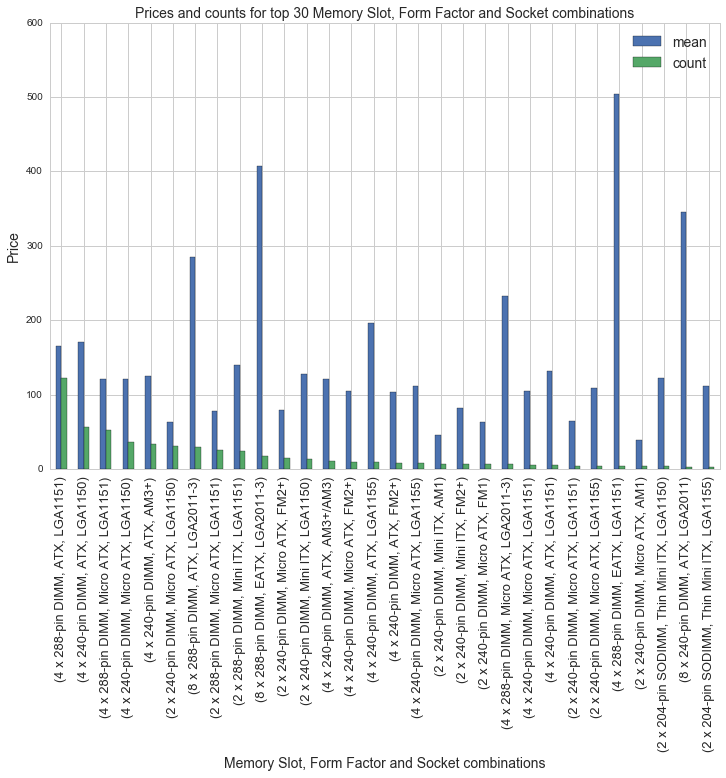

In [25]:
df[(df.avg>0)].groupby(['Memory Slots','Form Factor', 'socket']).avg.agg(['mean', 'count']).sort_values(by='count', ascending=False)[:30].plot(kind='bar', figsize=(12,8))
plt.title('Prices and counts for top 30 Memory Slot, Form Factor and Socket combinations', fontsize=14)
plt.xlabel('Memory Slot, Form Factor and Socket combinations', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.legend(fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/motherboard/features_vs_price.png'))

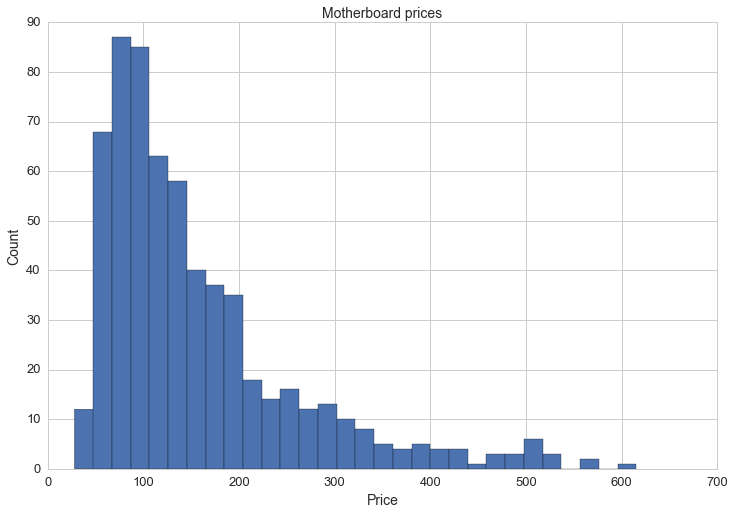

In [26]:
plt.figure(figsize=(12,8))
df[(df.avg!=0)&(df.avg<750)].avg.hist(bins=30)
plt.title('Motherboard prices', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/motherboard/price_histogram.png'))

In [217]:
#average motherboard price
df[df.avg>0].avg.mean()

157.50225109800783

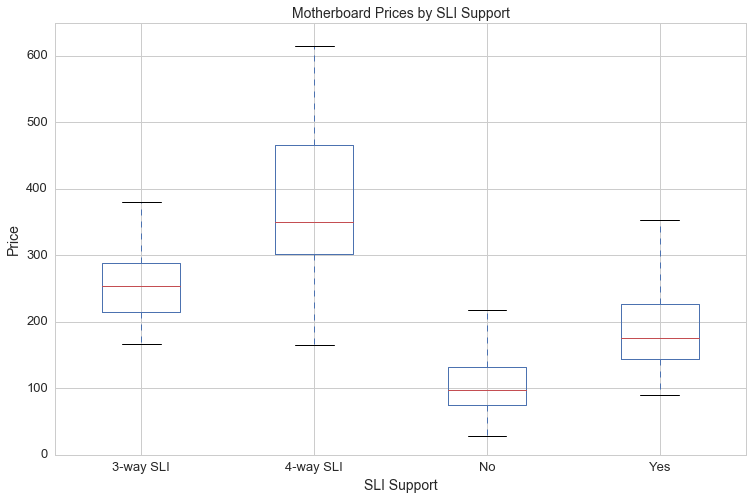

In [30]:
df[df.avg>0].boxplot(column='avg', by='SLI Support', figsize=(12,8))
plt.ylim([0,650])
plt.suptitle('')
plt.title('Motherboard Prices by SLI Support',fontsize=14)
plt.xlabel('SLI Support',fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/motherboard/SLI_prices.png'))

In [72]:
df.shape

(2400, 41)

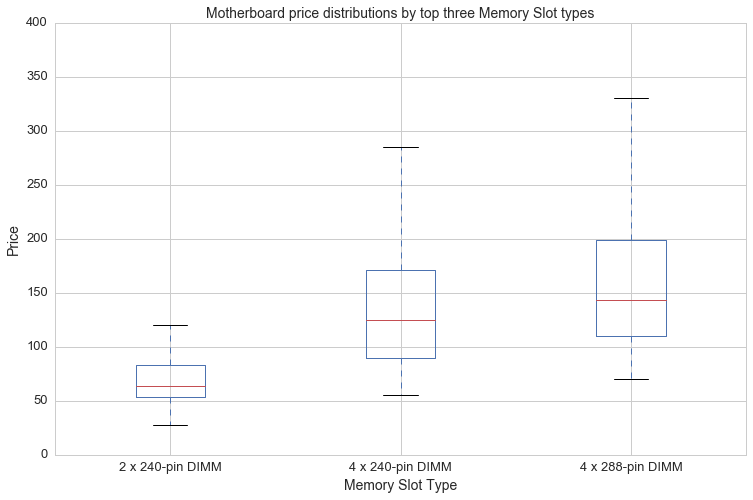

In [32]:
df[(df.avg>0)&((df['Memory Slots']=='4 x 240-pin DIMM')|(df['Memory Slots']=='2 x 240-pin DIMM')|\
              (df['Memory Slots']=='4 x 288-pin DIMM'))].boxplot(column='avg', by='Memory Slots', figsize=(12,8))
plt.ylim([0,400])
plt.suptitle('')
plt.title('Motherboard price distributions by top three Memory Slot types', fontsize=14)
plt.xlabel('Memory Slot Type',fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/motherboard/prices_by_mem_slot.png'))

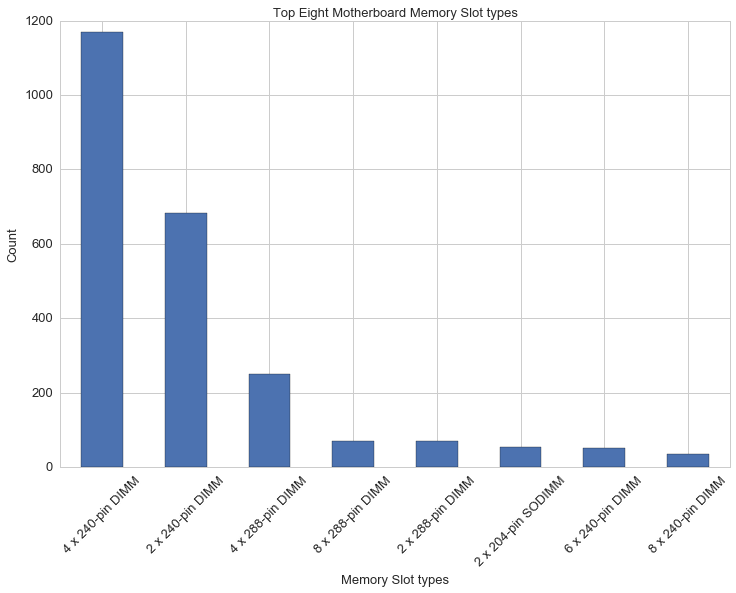

In [35]:
df['Memory Slots'].value_counts()[:8].plot(kind='bar', rot=45, figsize=(12,8))
plt.title('Top Eight Motherboard Memory Slot types', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xlabel('Memory Slot types', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/motherboard/motherboard_count_by_mem_type.png'))

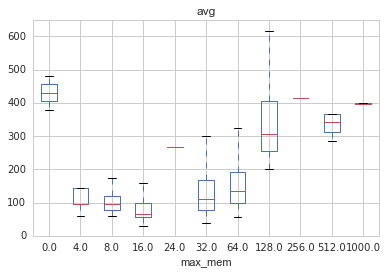

In [161]:
df[df.avg>0].boxplot(column='avg',by='max_mem')
plt.ylim([0,650])
plt.suptitle('')

In [ ]:
df['max_mem'] = df['Maximum Supported Memory']
df.max_mem = [x if type(x)==str else '0GB' for x in df.max_mem]
df.max_mem = [float(x.strip("GB")) if "GB" in x else float(x.strip('TB'))*1000 for x in df.max_mem]

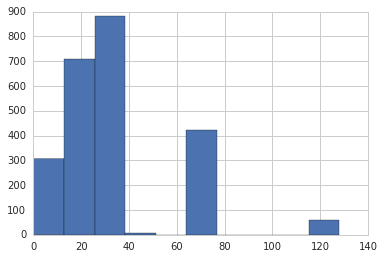

In [136]:
df[df.max_mem<250].max_mem.hist()